To determine Next Week's Deaths from the given features.

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing the dataset on the notebook.

In [415]:
df = pd.read_csv('D:/Covid19-Death-Predictions/train.csv')

In [416]:
df

,Id,Location,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
0,911530868,World,2372.0,2020,0.300,65.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,344.0
1,807936902,World,5023.0,2020,0.635,114.0,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361.0
2,773590408,World,5612.0,2020,0.710,116.0,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431.0
3,130466459,World,7580.0,2020,0.958,153.0,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463.0
4,544040446,World,8983.0,2020,1.136,187.0,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129151,541829605,Zimbabwe,464.0,2022,29.012,13.0,0.813,11949993.0,6297324.0,4601845.0,1050824.0,5665.0,74.72,39.37,28.77,6.57,354.0,1427.0,0.009,9.0
129152,969939474,Zimbabwe,471.0,2022,29.449,12.0,0.750,11958771.0,6299348.0,4605821.0,1053602.0,5295.0,74.77,39.39,28.80,6.59,331.0,1362.0,0.009,7.0
129153,667902340,Zimbabwe,450.0,2022,28.136,13.0,0.813,NaN,NaN,NaN,NaN,5316.0,NaN,NaN,NaN,NaN,332.0,1483.0,0.009,5.0
129154,961193720,Zimbabwe,277.0,2022,17.320,6.0,0.375,11974313.0,6305470.0,4611113.0,1057730.0,5358.0,74.87,39.43,28.83,6.61,335.0,1633.0,0.010,7.0


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129156 entries, 0 to 129155
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Id                                   129156 non-null  int64  
 1   Location                             129156 non-null  object 
 2   Weekly Cases                         128943 non-null  float64
 3   Year                                 129156 non-null  int64  
 4   Weekly Cases per Million             128288 non-null  float64
 5   Weekly Deaths                        127898 non-null  float64
 6   Weekly Deaths per Million            127247 non-null  float64
 7   Total Vaccinations                   40270 non-null   float64
 8   People Vaccinated                    38429 non-null   float64
 9   People Fully Vaccinated              36574 non-null   float64
 10  Total Boosters                       19847 non-null   float64
 11  Daily Vaccina

DATA cleaning

<AxesSubplot:>

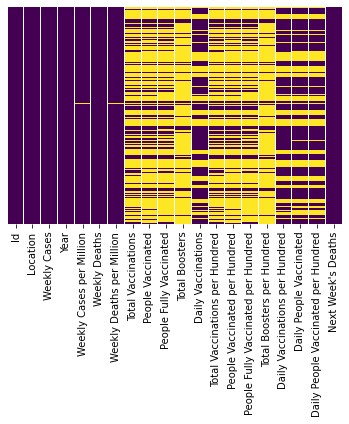

In [418]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [419]:
df.isnull().sum()

Id                                          0
Location                                    0
Weekly Cases                              213
Year                                        0
Weekly Cases per Million                  868
Weekly Deaths                            1258
Weekly Deaths per Million                1909
Total Vaccinations                      88886
People Vaccinated                       90727
People Fully Vaccinated                 92582
Total Boosters                         109309
Daily Vaccinations                      51316
Total Vaccinations per Hundred          88886
People Vaccinated per Hundred           90727
People Fully Vaccinated per Hundred     92582
Total Boosters per Hundred             109309
Daily Vaccinations per Hundred          51316
Daily People Vaccinated                 51765
Daily People Vaccinated per Hundred     51765
Next Week's Deaths                          0
dtype: int64

In [420]:
df.corr()['''Next Week's Deaths''']

Id                                    -0.002262
Weekly Cases                           0.660833
Year                                  -0.020374
Weekly Cases per Million               0.009862
Weekly Deaths                          0.992956
Weekly Deaths per Million              0.085626
Total Vaccinations                     0.414776
People Vaccinated                      0.450899
People Fully Vaccinated                0.399660
Total Boosters                         0.204060
Daily Vaccinations                     0.660108
Total Vaccinations per Hundred        -0.097737
People Vaccinated per Hundred         -0.110803
People Fully Vaccinated per Hundred   -0.128481
Total Boosters per Hundred            -0.199904
Daily Vaccinations per Hundred         0.023978
Daily People Vaccinated                0.642869
Daily People Vaccinated per Hundred    0.017402
Next Week's Deaths                     1.000000
Name: Next Week's Deaths, dtype: float64

In [421]:
df.groupby('Year').mean()

,Id,Weekly Cases,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
Year,,,,,,,,,,,,,,,,,,
2020,5.511817e+08,42837.938954,425.764538,990.350338,7.982709,7.164571e+05,4.650458e+05,8.199230e+03,1.000000e+00,74279.474138,0.290205,0.287143,0.000738,0.000000,363.410920,49077.500000,0.034420,1006.511365
2021,5.507007e+08,76299.791715,1022.586635,1342.544707,14.061087,1.410097e+08,7.473558e+07,5.485143e+07,6.645961e+06,558566.950278,61.242191,33.775779,27.800623,4.950560,3277.363829,243571.587057,0.157281,1324.765157
2022,5.481543e+08,202898.168462,3362.265360,669.430260,8.555170,4.804568e+08,2.154228e+08,1.873369e+08,7.587129e+07,328903.193639,154.733431,65.990661,60.094418,33.401969,1708.750359,75875.749112,0.040428,646.585754


In [422]:
df.drop('Location',axis=1,inplace=True)

In [423]:
df.columns

Index(['Id', 'Weekly Cases', 'Year', 'Weekly Cases per Million',
       'Weekly Deaths', 'Weekly Deaths per Million', 'Total Vaccinations',
       'People Vaccinated', 'People Fully Vaccinated', 'Total Boosters',
       'Daily Vaccinations', 'Total Vaccinations per Hundred',
       'People Vaccinated per Hundred', 'People Fully Vaccinated per Hundred',
       'Total Boosters per Hundred', 'Daily Vaccinations per Hundred',
       'Daily People Vaccinated', 'Daily People Vaccinated per Hundred',
       'Next Week's Deaths'],
      dtype='object')

In [424]:
df['Daily Vaccinations per Hundred'].fillna(value=df['Daily Vaccinations per Hundred'].mode(),inplace=True)
df['Daily People Vaccinated per Hundred'].fillna(value=df['Daily People Vaccinated per Hundred'].mode(),inplace=True)
df['Total Boosters'].fillna(value=df['Total Boosters'].mode(),inplace=True)
df['Total Boosters per Hundred'].fillna(value=df['Total Boosters per Hundred'].mode(),inplace=True)
df['Weekly Cases'].fillna(value=df['Weekly Cases'].mode(),inplace=True)
df['Weekly Cases per Million'].fillna(value=df['Weekly Cases per Million'].mode(),inplace=True)
df['Weekly Deaths per Million'].fillna(value=df['Weekly Deaths per Million'].mode(),inplace=True)
df['Total Vaccinations'].fillna(value=df['Total Vaccinations'].mode(),inplace=True)
df['People Vaccinated'].fillna(value=df['People Vaccinated'].mode(),inplace=True)
df['People Fully Vaccinated'].fillna(value=df['People Fully Vaccinated'].mode(),inplace=True)
df['Daily Vaccinations'].fillna(value=df['Daily Vaccinations'].mode(),inplace=True)
df['Total Vaccinations per Hundred'].fillna(value=df['Total Vaccinations per Hundred'].mode(),inplace=True)
df['People Vaccinated per Hundred'].fillna(value=df['People Vaccinated per Hundred'].mode(),inplace=True)
df['People Fully Vaccinated per Hundred'].fillna(value=df['People Fully Vaccinated per Hundred'].mode(),inplace=True)
df.fillna(value=1,axis=1,inplace=True)

In [425]:
X = df.drop(['''Next Week's Deaths'''],axis=1)
y= df['''Next Week's Deaths''']

Applying test train split.

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Importing Linear regression model and fiting the train data.

In [428]:
from sklearn.linear_model import LinearRegression

In [429]:
lm = LinearRegression()

In [430]:
lm.fit(X_train,y_train)

LinearRegression()

Getting and potting the predictions.

In [431]:
predictions = lm.predict(X_test)

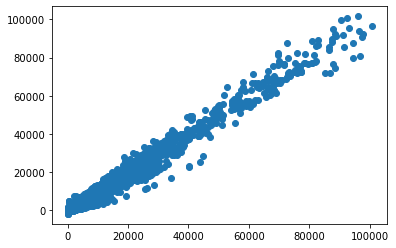

In [432]:
plt.scatter(x=y_test,y=predictions)

Importing and calculating the error metrics.

In [433]:
from sklearn import metrics

In [434]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 145.19414790837112


In [436]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 612.3682522055278


Importing test data.

In [437]:
test_data = pd.read_csv("D:/Covid19-Death-Predictions/test.csv")
test_data['Daily Vaccinations per Hundred'].fillna(value=test_data['Daily Vaccinations per Hundred'].mode(),inplace=True)
test_data['Daily People Vaccinated per Hundred'].fillna(value=test_data['Daily People Vaccinated per Hundred'].mode(),inplace=True)
test_data['Total Boosters'].fillna(value=test_data['Total Boosters'].mode(),inplace=True)
test_data['Total Boosters per Hundred'].fillna(value=test_data['Total Boosters per Hundred'].mode(),inplace=True)
test_data['Weekly Cases'].fillna(value=test_data['Weekly Cases'].mode(),inplace=True)
test_data['Weekly Cases per Million'].fillna(value=test_data['Weekly Cases per Million'].mode(),inplace=True)
test_data['Weekly Deaths per Million'].fillna(value=test_data['Weekly Deaths per Million'].mode(),inplace=True)
test_data['Total Vaccinations'].fillna(value=test_data['Total Vaccinations'].mode(),inplace=True)
test_data['People Vaccinated'].fillna(value=test_data['People Vaccinated'].mode(),inplace=True)
test_data['People Fully Vaccinated'].fillna(value=test_data['People Fully Vaccinated'].mode(),inplace=True)
test_data['Daily Vaccinations'].fillna(value=test_data['Daily Vaccinations'].mode(),inplace=True)
test_data['Total Vaccinations per Hundred'].fillna(value=test_data['Total Vaccinations per Hundred'].mode(),inplace=True)
test_data['People Vaccinated per Hundred'].fillna(value=test_data['People Vaccinated per Hundred'].mode(),inplace=True)
test_data['People Fully Vaccinated per Hundred'].fillna(value=test_data['People Fully Vaccinated per Hundred'].mode(),inplace=True)
test_data.fillna(value=1,axis=1,inplace=True)

In [438]:
test_data.drop('Location',axis=1,inplace=True)

In [439]:
test_pred_LR = lm.predict(test_data)

Submitting the file.

In [440]:
sample_submission= pd.read_csv("D:/Covid19-Death-Predictions/sample_submission.csv")
sample_submission['Next Weeks Deaths']=test_pred_LR
LR_results=sample_submission
print(LR_results)
LR_results.to_csv("D:/Covid19-Death-Predictions/linear_reg.csv", index=False)
LR_results.head(28)

              Id  Next Week's Deaths  Next Weeks Deaths
0      719557359                   0          30.662480
1      507527289                   0          49.157282
2      821551528                   0          -1.591469
3      696602016                   0         -13.269422
4      680387432                   0           2.495018
...          ...                 ...                ...
43047  713850901                   0         -95.162630
43048  980183629                   0         626.226861
43049  386597907                   0         525.824902
43050  293365001                   0          43.973197
43051  405586753                   0         -51.940904

[43052 rows x 3 columns]


,Id,Next Week's Deaths,Next Weeks Deaths
0,719557359,0,30.662480
1,507527289,0,49.157282
2,821551528,0,-1.591469
3,696602016,0,-13.269422
4,680387432,0,2.495018
5,140935772,0,91.916760
6,860599652,0,26.817150
7,154666619,0,-44.304976
8,569351983,0,57.358488
9,804571530,0,52.281554


DEEP LEARNING ANN .

In [441]:
X = df.drop(['''Next Week's Deaths'''],axis=1)
y= df['''Next Week's Deaths''']

In [442]:
type(y.values)

numpy.ndarray

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

Scaling and transforming the train and test data.

In [445]:
from sklearn.preprocessing import MinMaxScaler

In [316]:
scaler = MinMaxScaler()

In [317]:
X_train= scaler.fit_transform(X_train)

In [318]:
X_test = scaler.transform(X_test)

In [319]:
X_train.shape

(90409, 18)

In [320]:
X_test.shape

(38747, 18)

Importing tensorflow libraries.

In [321]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

Setting the model and applying activation function , optimizer and loss function.

In [322]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Setting the validation data and values for epochs and batch size.

In [323]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),verbose=1,
          batch_size=128,epochs=150)

Epoch 1/150
707/707 [==============================] - 1s 2ms/step - loss: 24723338.0000 - val_loss: 17767996.0000
Epoch 2/150
707/707 [==============================] - 2s 3ms/step - loss: 8428397.0000 - val_loss: 3607240.7500
Epoch 3/150
707/707 [==============================] - 2s 3ms/step - loss: 1721774.5000 - val_loss: 994958.5625
Epoch 4/150
707/707 [==============================] - 2s 3ms/step - loss: 813354.7500 - val_loss: 715099.8750
Epoch 5/150
707/707 [==============================] - 2s 2ms/step - loss: 655306.8125 - val_loss: 629280.2500
Epoch 6/150
707/707 [==============================] - 2s 3ms/step - loss: 559529.0000 - val_loss: 516739.6875
Epoch 7/150
707/707 [==============================] - 2s 3ms/step - loss: 499983.7812 - val_loss: 503761.4375
Epoch 8/150
707/707 [==============================] - 2s 3ms/step - loss: 460341.0938 - val_loss: 434978.0000
Epoch 9/150
707/707 [==============================] - 2s 2ms/step - loss: 427544.0938 - val_loss: 429588

Plotting the losses.

In [325]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

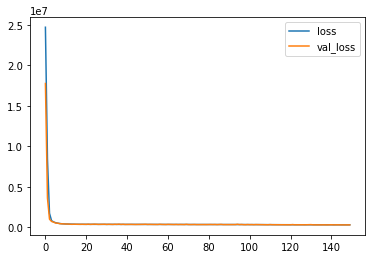

In [326]:
losses.plot()

We can see that loss and val_loss converge so no need for dropout but lets check the earlystopping by giving high value of epochs.

In [332]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [333]:
predictions = model.predict(X_test)

In [334]:
np.sqrt(mean_squared_error(y_test,predictions))

538.4325233218498

In [340]:
test_data = pd.read_csv("D:/Covid19-Death-Predictions/test.csv")
test_data.fillna(value=1,axis=1,inplace=True)

In [341]:
test_data.drop('Location',axis=1,inplace=True)

In [342]:
test_data = scaler.transform(test_data)

In [343]:
test_pred_LR = model.predict(test_data)

In [344]:
sample_submission= pd.read_csv("D:/Covid19-Death-Predictions/sample_submission.csv")
sample_submission['Next Weeks Deaths']=test_pred_LR
LR_results=sample_submission
print(LR_results)
LR_results.to_csv("D:/Covid19-Death-Predictions/dl1.csv", index=False)
LR_results.head(28)

              Id  Next Week's Deaths  Next Weeks Deaths
0      719557359                   0          24.615372
1      507527289                   0          28.175133
2      821551528                   0          25.531540
3      696602016                   0          30.546234
4      680387432                   0          37.918549
...          ...                 ...                ...
43047  713850901                   0          28.546448
43048  980183629                   0         471.518066
43049  386597907                   0          54.082687
43050  293365001                   0          29.066071
43051  405586753                   0          65.852066

[43052 rows x 3 columns]


,Id,Next Week's Deaths,Next Weeks Deaths
0,719557359,0,24.615372
1,507527289,0,28.175133
2,821551528,0,25.531540
3,696602016,0,30.546234
4,680387432,0,37.918549
5,140935772,0,117.741577
6,860599652,0,30.913986
7,154666619,0,47.865509
8,569351983,0,33.842804
9,804571530,0,28.958969


In [396]:
#setting parameters


In [397]:
from tensorflow.keras.callbacks import EarlyStopping

In [398]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [350]:
model = Sequential()
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam')

In [351]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
2826/2826 [==============================] - 8s 3ms/step - loss: 19526128.0000 - val_loss: 10037868.0000
Epoch 2/600
2826/2826 [==============================] - 6s 2ms/step - loss: 4983423.5000 - val_loss: 2038627.3750
Epoch 3/600
2826/2826 [==============================] - 7s 2ms/step - loss: 1103030.2500 - val_loss: 726922.3125
Epoch 4/600
2826/2826 [==============================] - 5s 2ms/step - loss: 610466.4375 - val_loss: 553587.9375
Epoch 5/600
2826/2826 [==============================] - 5s 2ms/step - loss: 490492.5312 - val_loss: 447436.1875
Epoch 6/600
2826/2826 [==============================] - 6s 2ms/step - loss: 423644.9375 - val_loss: 401891.5938
Epoch 7/600
2826/2826 [==============================] - 5s 2ms/step - loss: 389283.5625 - val_loss: 368445.8750
Epoch 8/600
2826/2826 [==============================] - 6s 2ms/step - loss: 366700.3125 - val_loss: 352890.6250
Epoch 9/600
2826/2826 [==============================] - 7s 2ms/step - loss: 354915.8750 

KeyboardInterrupt: 

In [234]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

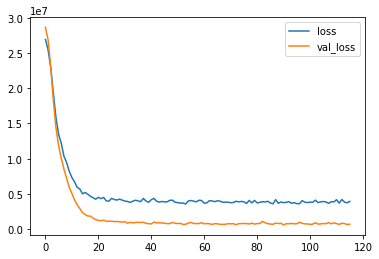

In [235]:
losses.plot()

In [236]:
predictions = model.predict(X_test)

In [237]:
np.sqrt(mean_squared_error(y_test,predictions))

841.4871014808764

In [238]:
test_data = pd.read_csv("D:/Covid19-Death-Predictions/test.csv")
test_data.fillna(value=1,axis=1,inplace=True)

In [239]:
l=[]
for x in test_data['Location']:
    if pd.isnull(x):
        l.append(5)
    else:
        l.append(len(x))
test_data['l']=l
test_data.drop('Location',axis=1,inplace=True)

In [240]:
test_data = scaler.transform(test_data)

In [241]:
test_pred_LR = model.predict(test_data)

In [244]:
sample_submission= pd.read_csv("D:/Covid19-Death-Predictions/sample_submission.csv")
sample_submission['Next Weeks Deaths']=test_pred_LR
LR_results=sample_submission
print(LR_results)
LR_results.to_csv("D:/Covid19-Death-Predictions/myrand2223.csv", index=False)
LR_results.head(28)

              Id  Next Week's Deaths  Next Weeks Deaths
0      719557359                   0          65.862022
1      507527289                   0          85.746689
2      821551528                   0          65.862022
3      696602016                   0          65.862022
4      680387432                   0         153.920105
...          ...                 ...                ...
43047  713850901                   0         277.761414
43048  980183629                   0         672.709229
43049  386597907                   0         525.253784
43050  293365001                   0          65.862022
43051  405586753                   0         172.332962

[43052 rows x 3 columns]


,Id,Next Week's Deaths,Next Weeks Deaths
0,719557359,0,65.862022
1,507527289,0,85.746689
2,821551528,0,65.862022
3,696602016,0,65.862022
4,680387432,0,153.920105
5,140935772,0,254.504883
6,860599652,0,65.862022
7,154666619,0,65.862022
8,569351983,0,171.775833
9,804571530,0,72.267746
